In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
train_df = pd.read_csv('Titanictrain.csv',usecols=['Survived','Pclass','Sex','SibSp','Parch','Fare'])
train_df.dropna(axis=1)
#most of feature have no resembleance of survived
print(train_df.shape)
train_df.head(10)


(891, 6)


,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
5,0,3,male,0,0,8.4583
6,0,1,male,0,0,51.8625
7,0,3,male,3,1,21.0750
8,1,3,female,0,2,11.1333
9,1,2,female,1,0,30.0708


In [58]:
train_df.Survived.mean()
train_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [59]:
df = pd.read_csv('Titanictrain.csv').dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [60]:
df['Sex'] = (df.Sex == 'male').astype(int)

In [61]:
li = [i for i in range(len(df.columns)) if( i not in (0,1,3,8,11)) ]
li

[2, 4, 5, 6, 7, 9, 10]

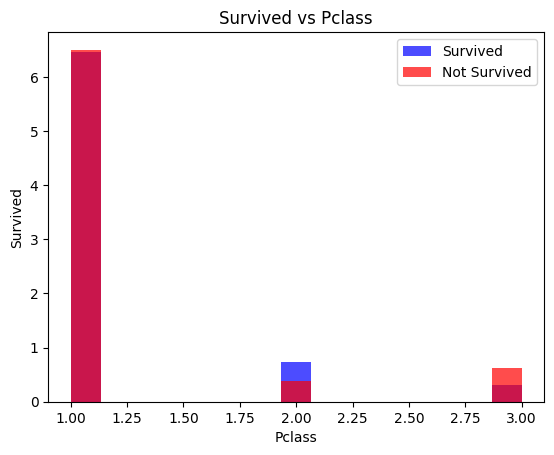

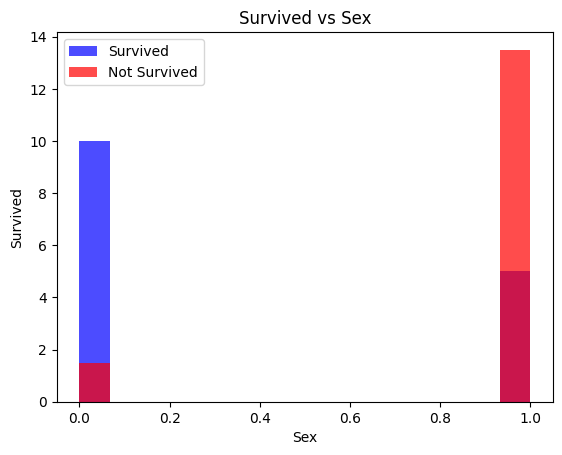

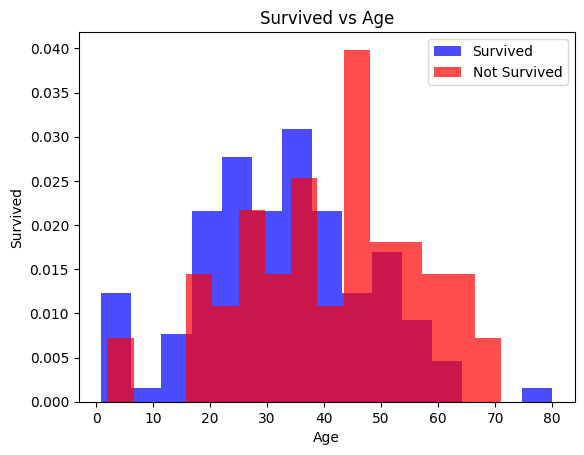

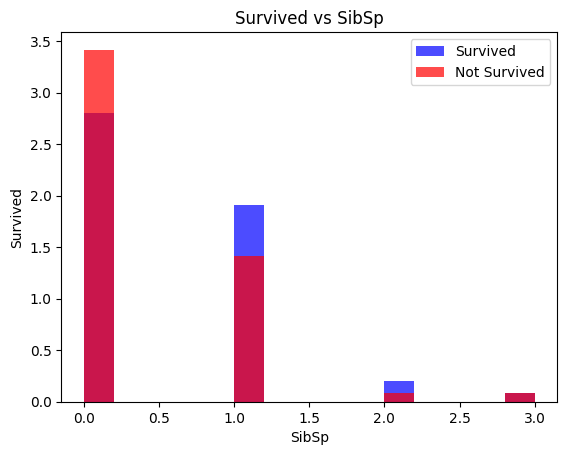

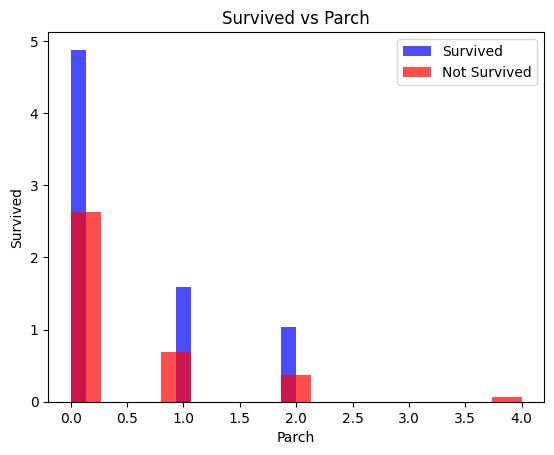

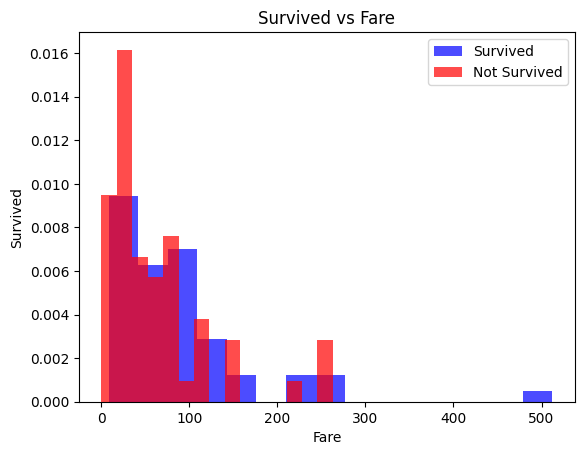

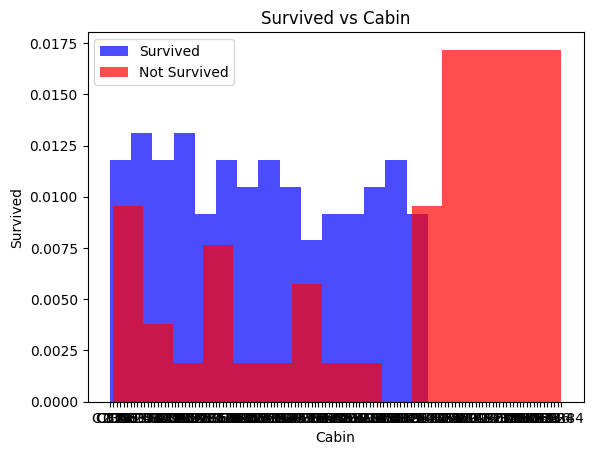

In [62]:
for i in li:
    label = df.columns[i]
    plt.hist(df[df.Survived == 1][label],color='blue',label='Survived',alpha=0.7, density=True, bins=15)
    plt.hist(df[df.Survived == 0][label],color='red',label='Not Survived',alpha=0.7, density=True, bins=15)
    plt.title("Survived vs {}".format(label))
    plt.xlabel(label)
    plt.ylabel("Survived")
    plt.legend()
    plt.show()

In [63]:

li = [i for i in range(len(df.columns)) if(i != 1 and i != 3)]
li

[0, 2, 4, 5, 6, 7, 8, 9, 10, 11]

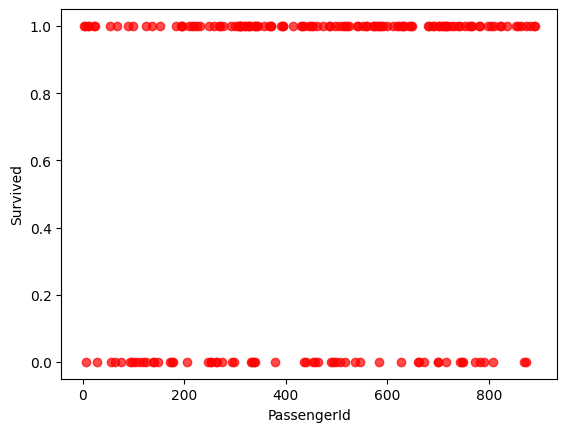

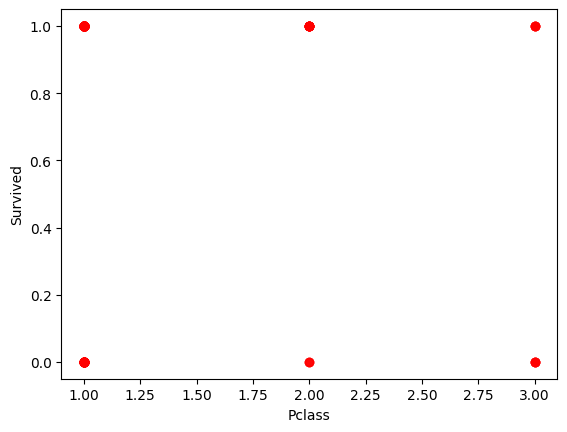

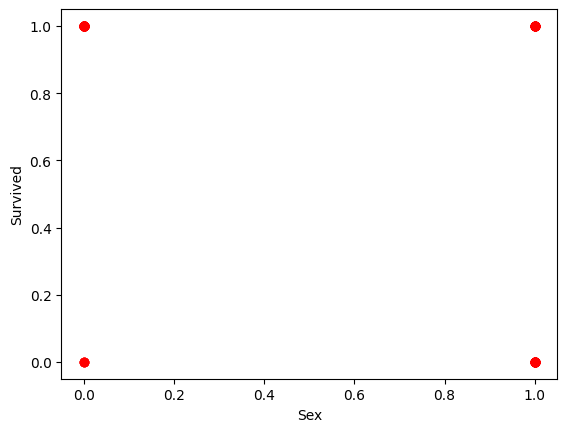

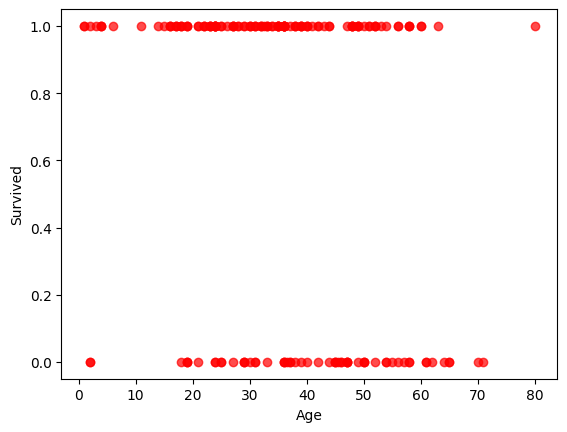

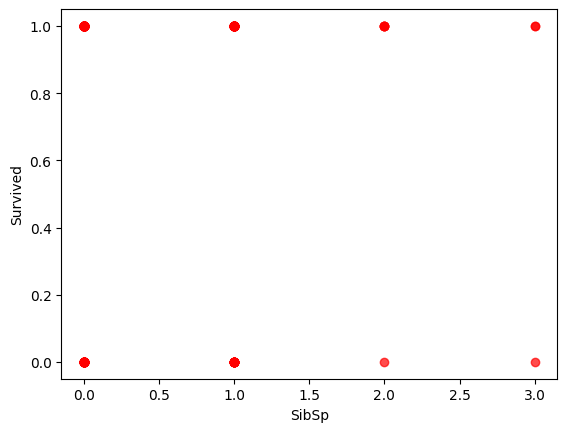

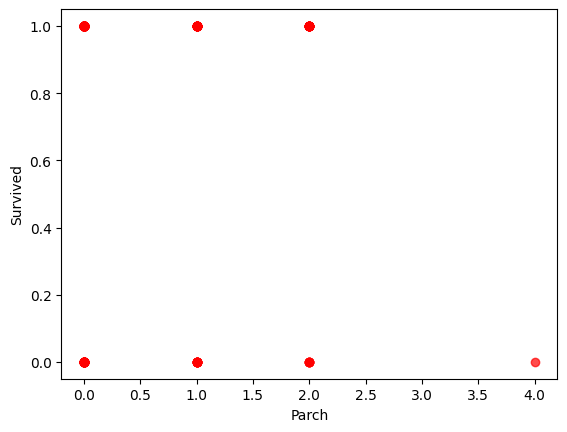

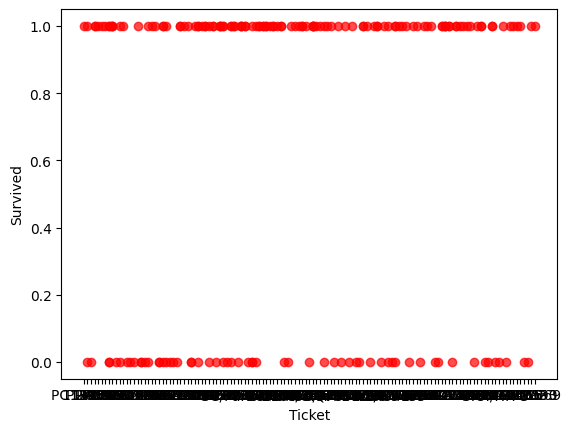

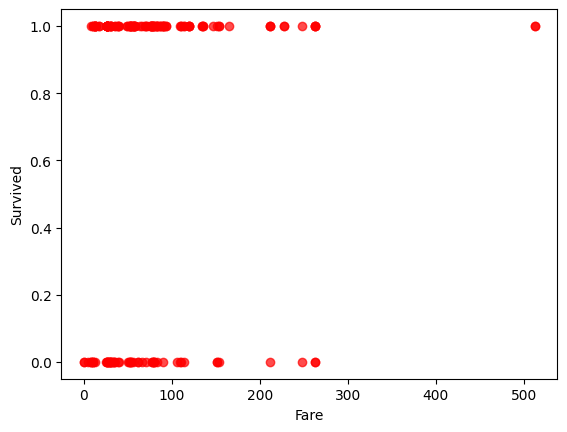

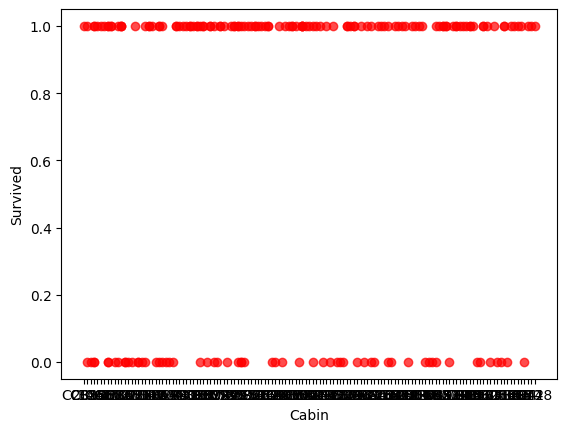

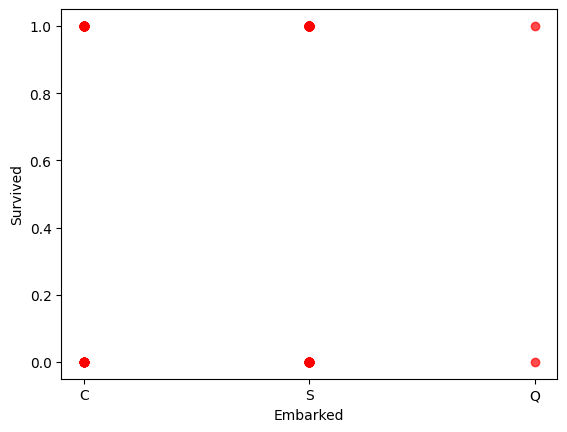

In [64]:
y = df.Survived.values
for i in li:
    X = df[df.columns[i]].values
    plt.scatter(X,y,marker='o',alpha=0.7,color='red')
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('Survived')
    plt.show()

In [65]:
from sklearn import preprocessing

In [66]:
onehot = preprocessing.OneHotEncoder(drop="first")
# hot encoding first
le = preprocessing.LabelEncoder() # same as 1 hot 

In [67]:
train_df['Sex'] = le.fit_transform(train_df.Sex)
# test_df['Sex'] = le.transform(test_df.Sex)

# Overfitting

In [68]:
# to drop coloumns
li = [i for i in train_df.columns if i not in ['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId']]
li

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

In [69]:
train_df = pd.read_csv('Titanictrain.csv',usecols=li)
test_df = pd.read_csv('Titanictest.csv')

train_df , val_df = np.split(train_df.sample(frac=1), [int(len(train_df)*0.8)])

# train_df.drop(li,axis=1)


In [70]:
len(train_df),len(val_df)

(712, 179)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from tqdm.auto import tqdm

In [ ]:
train_acc = []
val_acc = []
for i in tqdm(range(41)):
    model =GradientBoostingClassifier(n_estimators=2,max_depth=i)
    model.fit(train_df.drop('Survived',axis=1),train_df['Survived'])
    y_pred = model.predict(train_df.drop('Survived',axis=1))
    train_df['Survived'].values.squeeze(), y_pred.squeeze()